Epoch 0: 5927.008011987044
Epoch 1: 5527.7402763212385
Epoch 2: 5144.319544400729
Epoch 3: 4787.603081141726
Epoch 4: 4457.759299401895
Epoch 5: 4153.904282770986
Epoch 6: 3875.045391650228
Epoch 7: 3620.274442834315
Epoch 8: 3388.796640172233
Epoch 9: 3179.9070139390997
Epoch 10: 2992.9395098302216
Epoch 11: 2827.208445361583
Epoch 12: 2681.9549434729033
Epoch 13: 2556.282440601531
Epoch 14: 2449.104154198465
Epoch 15: 2359.108006547448
Epoch 16: 2284.7440846346785
Epoch 17: 2224.253050311509
Epoch 18: 2175.7414081564816
Epoch 19: 2137.2842520357917
Epoch 20: 2107.039716661841
Epoch 21: 2083.340172261644
Epoch 22: 2064.7508954532445
Epoch 23: 2050.0892433754457
Epoch 24: 2038.4129306645398
Epoch 25: 2028.9901048146075
Epoch 26: 2021.2622397786365
Epoch 27: 2014.8075958170414
Epoch 28: 2009.3109448125138
Epoch 29: 2004.537245279772
Epoch 30: 2000.3109464334004
Epoch 31: 1996.5014501991616
Epoch 32: 1993.0111325452197
Epoch 33: 1989.7673238099985
Epoch 34: 1986.7149132690115
Epoch 35: 1

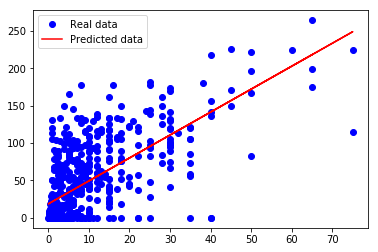

In [3]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd


#DATA_FILE = 'fire_theft.xls'
DATA_FILE = 'epldata_final.xlsx'
#DATA_FILE = pd.read_csv('avocado.csv', sep=',', header=0) 

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

# Step 8: train the model
    for i in range(1000): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
# Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        if (total_loss/n_samples) < 1800:
            break;

# close the writer when you're done using it
    writer.close() 

# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()